Linear Least Squares
========

# Theory
**Least Squares (LS)** is a curve fitting method that is primarily estimate the parameters of a chosen model function to best approximate the general trend of a given data set.

## Definition
**Least Squares (LS)** strategy to estimate the model function parameters, that best fit the data; is to minimize the sum of the squares of the residuals (a residual being the error between the observed value provided by data and the fitted value provided by a model function).

Formally, the minimization problem that **LS** presented is
$$
\begin{equation}
\text{LS} := \min \sum_{i=1}^n r_i^2 \qquad \text{,where} \quad r_i = \hat{f}(\mathbf{x}_i\,, \beta) - y_i
\end{equation}$$

where for a data set of $n$ points $(\mathbf{x}, y)$, a model function $(\hat{f}(\mathbf{x}, \beta))$, and a residual (r). We want to find parameters $\beta$ that minimize the sum of the squared residuals above.

> To elaborate  more, **LS** method view the parameters $\beta$ as the variables and $\mathbf{x}$ data points as given constant weights in the model function, hence the minimization stepup would solve for $\beta$. For this to work the number of data points $n$ has to be greater than or equal to the number of parameters of the model function.

**Linear Least Squares (LLS)** is a type of **LS** method that deals with the category of model functions that their parameters $\beta$ are independent and linearly combined. The general form such model functions is
$$
\begin{equation}
\hat{f}(\mathbf{x}, \beta) = \beta_1 \phi_1(\mathbf{x}) + \beta_2 \phi_2(\mathbf{x}) + \dots + \beta_n \phi_n(\mathbf{x})
\end{equation}$$

A valid example of such model function
$$
\begin{equation*}
\hat{f}(\mathbf{x},\beta) = \beta_1 + \beta_2 \mathbf{x} + \beta_3 \mathbf{x}^2 + \beta_4 \sin(4\mathbf{x}) + \beta_5 \ln(2\mathbf{x})
\end{equation*}$$

To solve for optimal $\beta$ in **LLS**, there is two approach to achieve this minimization task
- Exploiting linear algebra concepts
- Exploiting multivariate calculus concepts

### Linear Algebra Approach  
Lets write explicitly the linear system, since $\beta$ are linearly combined; of residuals equations
$$
\begin{align*}
\overbrace{\beta_1 \phi_1(\mathbf{x}_1) + \beta_2 \phi_2(\mathbf{x}_1) + \dots + \beta_n \phi_n(\mathbf{x}_1) \vphantom{\Large f^{(k)}}}^{\normalsize \hat{f}(\mathbf{x}, \beta)} - \overbrace{y_1 \vphantom{\Large f^{(k)}}}^{\normalsize y_i} \; &= \overbrace{r_1 \vphantom{\Large f^{(k)}}}^{\normalsize r_i} \\[5pt]
\beta_1 \phi_1(\mathbf{x}_2) + \beta_2 \phi_2(\mathbf{x}_2) + \dots + \beta_n \phi_n(\mathbf{x}_2) - y_2 &= r_2 \\[5pt]
\beta_1 \phi_1(\mathbf{x}_m) + \beta_2 \phi_2(\mathbf{x}_m) + \dots + \beta_n \phi_n(\mathbf{x}_m) - y_m \; &= \;\,r_m
\end{align*}$$

This system of linear equations can be expressed in matrix form
$$
\begin{equation*}
\textbf{A} \vec{\beta} - \vec{y} = \vec{r}
\end{equation*}$$

where $\textbf{A} = \phi_i(\mathbf{x}_j) \in \mathbb{R}^{m \times n}$ is the constant weights matrix (model matrix), $\vec{\beta} \in \mathbb{R}^{n}$ model parameters vector, $\vec{y} \in \mathbb{R}^{m}$ observed values vector, and $\vec{r} \in \mathbb{R}^{m}$ is residuals vector. 

#### Graphical Representation
To understand the minimization process in this approach, lets investigate the visual representation of simple version of this linear system. Lets consider a problem in $2\text{D}$ of fitting a straight line to 3 data points $\lbrace (x_1, y_1), (x_2, y_2), (x_3, y_3) \rbrace$. The expected model function is in the form 
$$
\hat{f}(x, \beta) = \beta_1 x + \beta_2
$$

And the linear system of residuals equations reads 
$$
\begin{align*}
\beta_1 x_1 + \beta_2 - y_1 &= r_1 \\[5pt]
\beta_1 x_2 + \beta_2 - y_2 &= r_2 \\[5pt]
\beta_1 x_3 + \beta_2 - y_3 &= r_3 \\[5pt]
\end{align*}$$

In matrix form
$$
\begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
x_3 & 1
\end{bmatrix}
\begin{bmatrix}
\beta_1 \\
\beta_2
\end{bmatrix}
- 
\begin{bmatrix}
y_1 \\
y_2 \\
y_3
\end{bmatrix}
=
\begin{bmatrix}
r_1 \\
r_2 \\
r_3
\end{bmatrix}
$$

The linear combination of the two column vectors of matrix $\textbf{A}$ "i.e. $\beta_1 \vec{a}_1 + \beta_2 \vec{a}_2$" span a plane in $\mathbb{R}^3$, the space of all possible vectors with length $m=3$ "since 3 data points". Each point in this plane correspond to the prediction of the model function at some unique combination function parameters $(\beta_1, \beta_2)$. To view this graphically

### Multivariate Calculus Approach

## Examples


# Implementation


## Imports

In [2]:
import numpy as np
import sympy as sp
import pandas as pd
from sympy.abc import x
from typing import Callable
import matplotlib.pyplot as plt

## Parameters

In [3]:
N = 50                      # number of collocation points
x = np.linspace(1,10, num=N)
f = lambda x: x**3

y_rnd = f(x) + 3*np.random.rand(N)
x_rnd = x + 2*np.random.rand(N)

points = np.stack((x_rnd,y_rnd), axis=1)

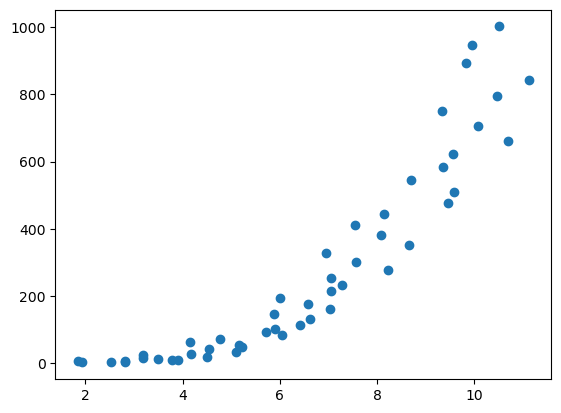

In [4]:
plt.plot(x_rnd,y_rnd, "o")

## Algorithm



In [11]:
def LS(points: list[float, float], order: int =1) -> tuple[Callable, list[Callable]]:
    '''
    _summary_

    Args:
        points: _description_

    Returns:
        _description_
    '''

    # error equations components "i.e. Ax - c = errors"
    column_vectors = [points[:,0]**n for n in range(order,-1,-1)]
    A = np.column_stack(column_vectors)
    c = points[:,1]
    
    # normal equations components "i.e. A*x = b"
    A_star = np.dot(A.T,A)
    b = np.dot(A.T,c)
    
    x = np.linalg.solve(A_star, b)

    # x = b/A_star

    return x

## Results Visualization


In [12]:
beta = LS(points, order=3)
beta

array([  -0.47449123,   23.77274091, -140.11333013,  217.21869996])

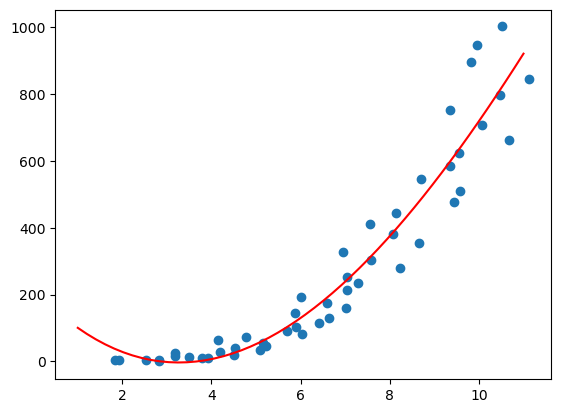

In [13]:
x = np.linspace(1,11)
plt.plot(x_rnd,y_rnd, "o")
plt.plot(x, beta[0]*x**3 + beta[1]*x**2 + beta[2]*x + beta[3], "r")
# plt.plot(x, beta[0]*x**4 + beta[1]*x**3 + beta[2]*x**2 + beta[3]*x + beta[4], "r")
# plt.plot(x, beta[0]*x**5 + beta[1]*x**4 + beta[2]*x**3 + beta[3]*x**2 + beta[4]*x + beta[5], "r")
# plt.plot(x, beta[0]*x**2 + beta[1]*x + beta[2], "r")